In [57]:
import warnings
warnings.filterwarnings('ignore')

ROOT_DATASETS = '/media/arthur/DATA/Data sets/MTH7017P/'

from utils import *

set_cache_dir('pickles/slides8')

RUN_DOWNLOADS = False

# Working with Climate Data

<div class="alert alert-block alert-info">
<b>Our objectives:</b> 
<p>
<ul>
<li>Accessing and manipulating historic and climate model data</li>
<li>Understanding the different scenarios used in climate models</li>
<li>Carrying out a basic analysis of time series data</li>
</ul>
</p>
</div>

## Past and Present Climate

As a first resource to understand the climate, we can leverage historic data. These are typically obtained via different types of measurements, e.g. remote sensing via satellites. However, the further we go back in time, the more scarse the data is. To address this, data is combined with climate models to provide a full picture. 
The video below provides a short introduction to what is called *reanalysis* (source: Copernicus).

In [2]:
from IPython.display import HTML

video_url = "https://climate.copernicus.eu/sites/default/files/2020-01/2019.11.21_ECMWF%20Reanalysis%20video_with%20caption_v4_IOB.mp4"
html = f"""
<video width="800" height="500">
<source
src="{video_url}"
type="video/mp4">
</video>
"""
HTML(html)

There are multiple Reanalysis Products. Here, we will look at ECMWF Reanalysis v5 (ERA5). To access these data, we can use the interface provided by Copernicus, accessible 
[here](https://cds.climate.copernicus.eu/datasets). There are many datasets available, we see for instance one called "ERA5 hourly data on single levels from 1940 to present".

In [3]:
%%html
<iframe width="100%" height="500px" src="https://cds.climate.copernicus.eu/datasets"></iframe>

To be able to download these data, you will need to create an account.

1. You can then submit a request for a dataset.
2. You can also use the python api by installing the cdsapi python package.

For the latter, we will follow the [instructions](https://cds.climate.copernicus.eu/how-to-api) given on the Copernicus website. Note that the JupyterHub you are using runs on Linux, hence you need to follow the section for Linux. Here are the necessary steps:

1. Copy the two lines from section 1 (with the url and key)
2. In the Jupyter Hub, start a new terminal
3. Type the following command:
   
   ```bash
   nano .cdsapirc
   ```

   This will create a new file `.cdsapirc` and open a terminal editor to edit that file. Paste the two lines, then press `CTRL+X` to exit, followed by `Y` to confirm.
5. Finally, install the cdsapi package by running this command:

```bash
conda install cdsapi
```

Let us see if this works by downloading some data from ERA5. If you look for the entry *ERA5 hourly data on single levels from 1940 to present* among the datasets, you can then select *Download*. Here you need to specify what data you want to retrieve. For this example, we will only download a small amount of data:

1. Choose the variable *2m temperature*
2. 

```python
import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": ["2m_temperature"],
    "year": ["2025"],
    "month": ["01", "02", "03"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "zip"
}

target = '/home/jovyan/datasets/era5_data1.zip'

client = cdsapi.Client()
client.retrieve(dataset, request, target).download()
```

In [15]:
import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": ["2m_temperature"],
    "year": ["2025"],
    "month": ["01", "02", "03"],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "zip"
}

# target is the path to the file where we will download the data
target = '/media/arthur/DATA/Data sets/MTH7017P/era5_1.zip'

from pathlib import Path
if not Path(target).exists() and RUN_DOWNLOADS:
    print('Downloading data...')
    client = cdsapi.Client()
    client.retrieve(dataset, request, target)

We now need to unzip the downloaded data. We will do this from the terminal. 

```bash
# we go to the directory with the data
cd ~/datasets/
# we unzip it
unzip era5_data1.zip
```

This will generate a file in .nc format. This is a very common format for climate data. We can read these data using the xarray package:

```python
import xarray as xr
dataset = xr.open_dataset('/home/jovyan/datasets/data_stream-oper_stepType-instant.nc')
dataset
```

In [30]:
try:
    dataset_html1 = load_from_cache('dataset_html1')
except:
    import xarray as xr
    dataset = xr.open_dataset('/media/arthur/DATA/Data sets/MTH7017P/data_stream-oper_stepType-instant.nc')
    dataset_html1 = dataset._repr_html_()
    save_to_cache('dataset_html1', dataset_html1)

HTML(dataset_html1)

We see that our data are indexed by three coordinates: time, latitude and longitude. We have one data variable indexed by those three coordinates, t2m, which is the temperature. 

We can access the coordinates as follows:

```python
dataset.valid_time
```

```python
dataset.longitude
```

In [33]:
try:
    dataset_html2 = load_from_cache('dataset_html2')

except:
    dataset_html2 = dataset.valid_time._repr_html_()
    save_to_cache('dataset_html2', dataset_html2)

HTML(dataset_html2)

In [37]:
try:
    dataset_html3 = load_from_cache('dataset_html3')

except:
    dataset_html3 = dataset.longitude._repr_html_()
    save_to_cache('dataset_html3', dataset_html3)

HTML(dataset_html3)

Similarly, we can access the variable values:

```python
dataset.t2m
```

In [40]:
try:
    dataset_html4 = load_from_cache('dataset_html4')

except:
    dataset_html4 = dataset.t2m._repr_html_()
    save_to_cache('dataset_html4', dataset_html4)

HTML(dataset_html4)

These are a lot of data! The xarray package makes it easy to select subsets of data, using two methods: `.isel` and `.sel`.

For instance, if we want to select all the data from the first time index (0), we can do so by typing:

```python
dataset.isel(time=0)
```

In [41]:
try:
    dataset_html5 = load_from_cache('dataset_html5')

except:
    dataset_html5 = dataset.isel(valid_time=0)._repr_html_()
    save_to_cache('dataset_html5', dataset_html5)

HTML(dataset_html5)



We can plot these data:

```python
    dataset.isel(valid_time=0).t2m.plot()
```

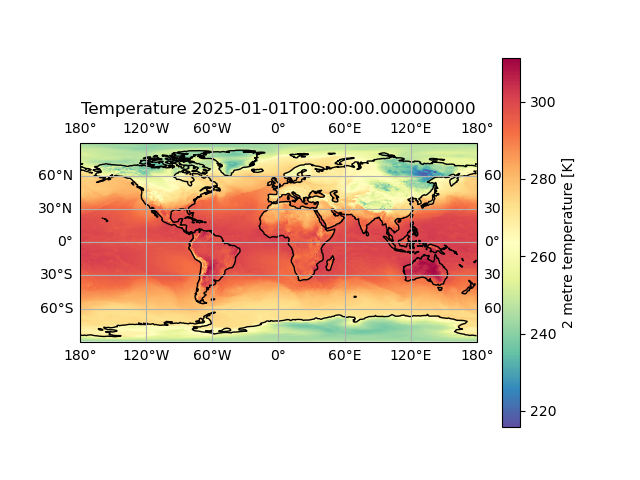

In [59]:
%matplotlib widget
import matplotlib.pyplot as plt
import cartopy.crs as crs

try:
    data_plot1 = load_from_cache('data_plot1')
except:
    data_plot1 = dataset.isel(valid_time=0)
    save_to_cache('data_plot1', data_plot1)

fig = plt.figure()
ax = fig.add_subplot(projection=crs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
data_plot1.t2m.plot(cmap='Spectral_r')
plt.title(f'Temperature {data_plot1.valid_time.values}');

The temperature is in Kelvin. We can convert this into degree Celcius.

```python
def convert_kelvin_to_celcius(temp_kelvin):
    return temp_kelvin - 273.15

data_plot['temp'] = convert_kelvin_to_celcius(data_plot.t2m)
```

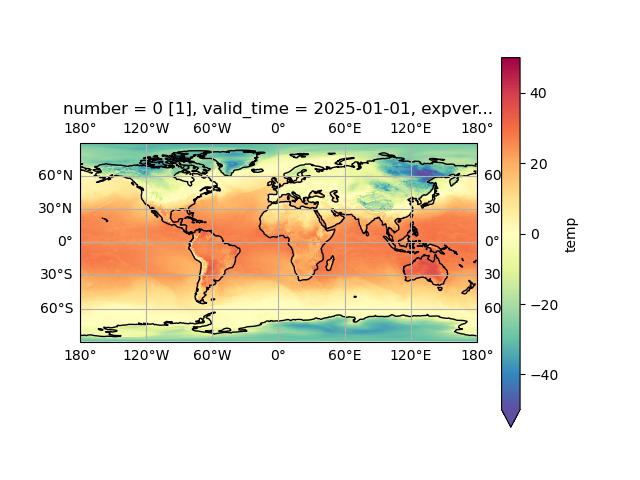

In [45]:
def convert_kelvin_to_celcius(temp_kelvin):
    return temp_kelvin - 273.15

fig = plt.figure()
ax = fig.add_subplot(projection=crs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
data_plot1['temp'] = convert_kelvin_to_celcius(data_plot1.t2m)
data_plot1.temp.plot(cmap='Spectral_r', vmin=-50, vmax=50);

We can select a subregion as follows:

```python
data_europe = data_plot.sel(longitude=slice(-5, 5), latitude=slice(40, 50))
```

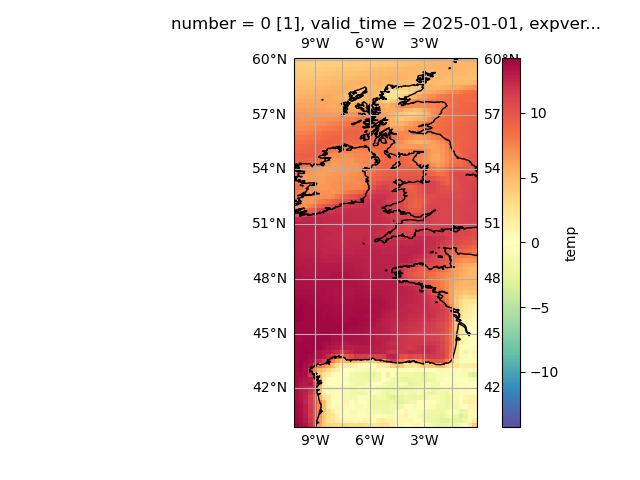

In [46]:
data_europe = data_plot1.sel(longitude=slice(350, 360), latitude=slice(60, 40))
fig = plt.figure()
ax = fig.add_subplot(projection=crs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
data_europe.temp.plot(cmap='Spectral_r');

If we want the temperature on the 5th of March at 1pm:

```python
data_march_5 = dataset.sel(valid_time='2025-03-05 13:00:00', method='nearest')
data_march_5 = data_march_5.sel(longitude=slice(350, 360), latitude=slice(60, 40))
data_march_5['temp'] = convert_kelvin_to_celcius(data_march_5.t2m)
```

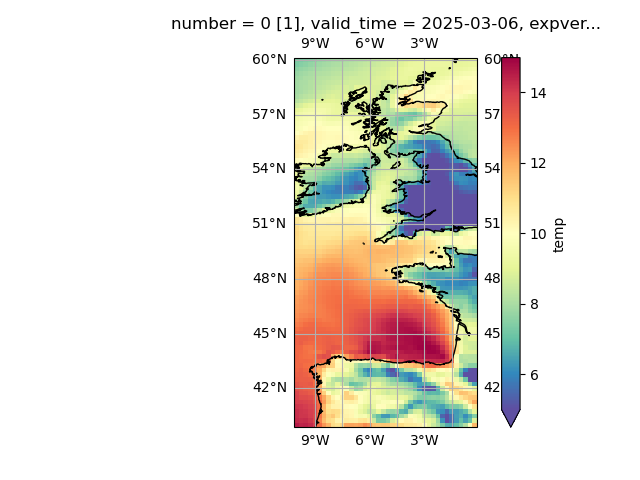

In [48]:
try:
    data_march_5 = load_from_cache('data_march_5')
except:
    data_march_5 = dataset.sel(valid_time='2025-03-05 13:00:00', method='nearest')
    data_march_5 = data_march_5.sel(longitude=slice(350, 360), latitude=slice(60, 40))
    data_march_5['temp'] = convert_kelvin_to_celcius(data_march_5.t2m)
    save_to_cache('data_march_5', data_march_5)
    
fig = plt.figure()
ax = fig.add_subplot(projection=crs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
data_march_5.temp.plot(cmap='Spectral_r', vmin=5);

We can also look at a time series at a specific location:

```python
time_series = dataset.sel(longitude=0, latitude=52, method='nearest')
time_series['temp'] = convert_kelvin_to_celcius(time_series.t2m)

plt.figure()
time_series.temp.plot()
```

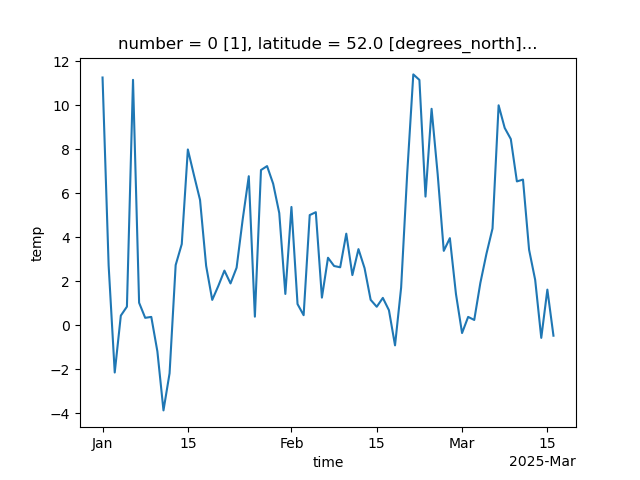

In [50]:
try:
    time_series = load_from_cache('time_series')
except:
    time_series = dataset.sel(longitude=0, latitude=52, method='nearest')
    time_series['temp'] = convert_kelvin_to_celcius(time_series.t2m)
    save_to_cache('time_series', time_series)

plt.figure()
time_series.temp.plot();

## Future Climate

Climate Models are a key tool to understand future climate. Climate models can be run to assess how the climate will evolve in the future. 



Typically, they are run according to different scenarios of emissions (Representative Concentrations Pathways):

1. RCP2.6: greenhouse gas emissions are significantly reduced by 2100.
2. RCP4.5: scenario where greenhouse gas emissions would peak around 2040.
3. RCP6.0: scenario where greenhouse gas emissions would peak around 2080.
4. RCP8.5: *worst-case* scenario, where greenhouse gas emissions continue to rise through the 21st century.

There are many ESM (Earth System Model) available. The last generation of models is grouped under the CMIP6 (Coupled Model Intercomparison Project Phase 6). Here we will load data from a model from the previous generation of models, CMIP5.

On the Corpernicus Climate Data Store, look for the dataset *CMIP5 monthly data on single levels*. 

When clicking on *Download* you will first be required to select an experiment. Let us select `RCP 4.5`.

There are many available variables. For this example, let us look at the variable
`Maximum 2m temperature in the last 24 hours`. This could be useful for instance if we were to look into risk due to heatwaves.

We now need to select a model. We will choose e.g. `CESM1-CAM5 (NCAR, USA)`. As for the ensemble member, just keep the one selected. For period, go into RCP and select `200601-210012`.

In [58]:
import cdsapi

dataset = "projections-cmip5-monthly-single-levels"
request = {
    "experiment": "rcp_4_5",
    "variable": ["maximum_2m_temperature_in_the_last_24_hours"],
    "model": "cesm1_cam5",
    "ensemble_member": "r1i1p1",
    "period": ["200601-210012"]
}

target = ROOT_DATASETS + 'cmip5_ecm_month.zip'

if not Path(target).exists() and RUN_DOWNLOADS:
    client = cdsapi.Client()
    client.retrieve(dataset, request, target)

Like we did previously, we need to unzip the data. Once you have done that you should have a file called `tasmax_Amon_CESM1-CAM5_rcp45_r1i1p1_200601-210012.nc`, which you can open with xarray.

In [54]:
try:
    html_cmip1 = load_from_cache('html_cmip1')
except:
    cmip5_data = xr.open_dataset(ROOT_DATASETS + 'tasmax_Amon_CESM1-CAM5_rcp45_r1i1p1_200601-210012.nc')
    html_cmip1 = cmip5_data._repr_html_()
    save_to_cache('html_cmip1', html_cmip1)

HTML(html_cmip1)

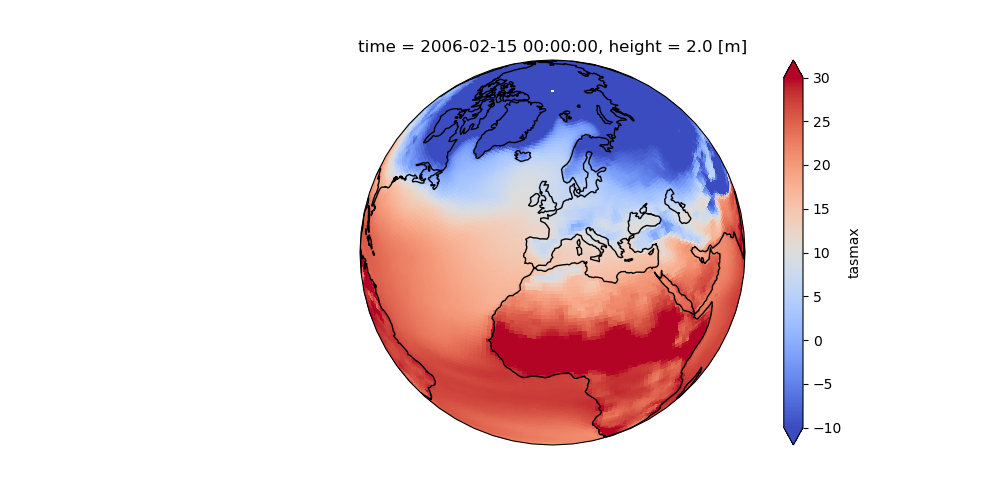

In [56]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

try:
    cmip_plot = load_from_cache('cmip_plot')
except:
    cmip_plot = (cmip5_data.tasmax - 273.15).isel(time=1)
    save_to_cache('cmip_plot', cmip_plot)

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.NearsidePerspective(0, 40))
ax.coastlines()

# Add other features or data as needed
# ax.plot(longitudes, latitudes, transform=ccrs.Geodetic(), marker='o')
cmip_plot.plot(ax=ax, cmap='coolwarm', transform=ccrs.PlateCarree(),
                                              vmin=-10, vmax=30);

One core difference between CMIP5 and CMIP6 is that CMIP6 models have a higher-resoltion. This means more accurate models, but also more data!